In [26]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
from keras.models import Model
import matplotlib.pyplot as plt
import numpy as np



In [27]:
# Load the MNIST dataset
X, y = fetch_openml('mnist_784', return_X_y=True, as_frame=False)

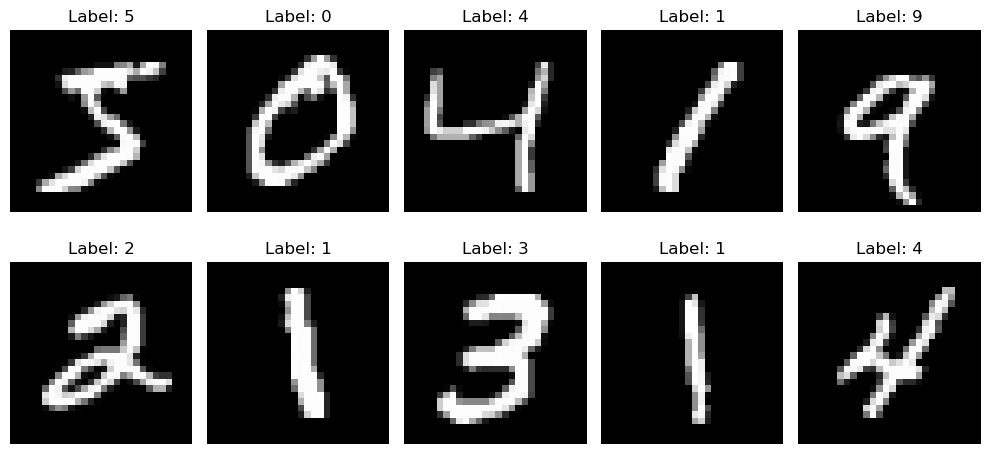

In [28]:
fig, axs = plt.subplots(2, 5, figsize=(10, 5))  # Create a 5x2 grid of subplots
for i in range(10):
    row = i // 5  # Calculate row index
    col = i % 5  # Calculate column index
    axs[row, col].imshow(X[i].reshape(28, 28), cmap='gray')  # Display image in subplot
    axs[row, col].set_title(f'Label: {y[i]}')  # Set title of subplot to label of image
    axs[row, col].axis('off')  # Hide axes
plt.tight_layout()  # Ensure subplots do not overlap
plt.show()  # Display the grid of subplots

In [29]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) 

# Standardize features
scaler = StandardScaler()  
scaler.fit(X_train)
X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)  

# Create MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=1000)  # 3 hidden layers with 100 neurons each

# Train the model
mlp.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = mlp.predict(X_test)

# Model Accuracy
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  

[[1359    1    5    0    2    5    1    2    3    2]
 [   0 1605   14    3    0    3    1    4    2    0]
 [   5    1 1389   11    5    1    5    9    4    3]
 [   3    1   13 1380    3   14    0    8    4    5]
 [   0    4    6    0 1292    0    0    5    0   21]
 [   0    0    1   13    1 1271    2    2    4    3]
 [   6    1    1    0    4   20 1293    0    5    1]
 [   1    3    5    1    7    1    0 1412    2   12]
 [  10    7   13   14    5   10    3    2 1281    6]
 [   3    2    0    9   12    3    0   12    2 1330]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1380
           1       0.99      0.98      0.99      1632
           2       0.96      0.97      0.96      1433
           3       0.96      0.96      0.96      1431
           4       0.97      0.97      0.97      1328
           5       0.96      0.98      0.97      1297
           6       0.99      0.97      0.98      1331
           7       0.97      0.98   

In [30]:
# get the mean activations for each label for each neuron
activations = mlp.coefs_

mean_label_activation = []
for i in range(len(activations)):
    mean_label_activation.append(activations[i].mean(axis=1))



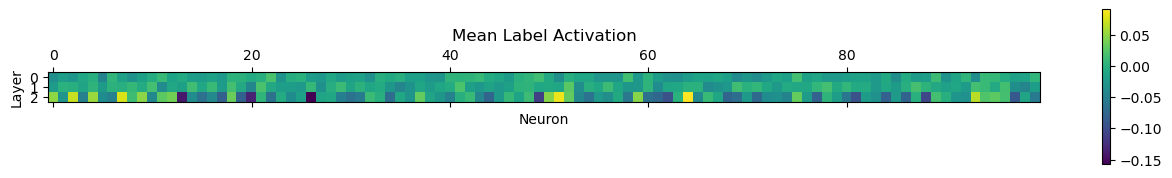

In [31]:
# plot the activations
plt.matshow(mean_label_activation[1:])
plt.title('Mean Label Activation')
plt.colorbar()
plt.ylabel('Layer')
plt.xlabel('Neuron')
plt.show()

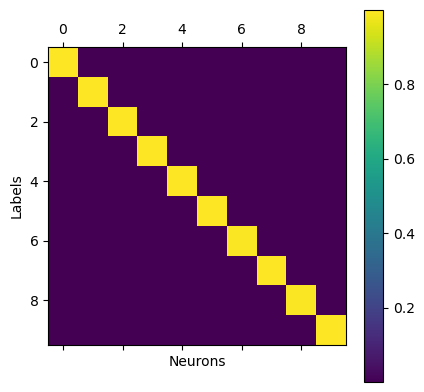

In [32]:
# Get the unique labels in the training data
unique_labels = np.unique(y_train)

# Initialize a list to store the average activations for each label
avg_activations = []

# For each unique label
for label in unique_labels:
    # Get the instances in the training data that have this label
    instances = X_train[y_train == label]
    
    # Get the activations of these instances (i.e., pass them through the MLP)
    activations = mlp.predict_proba(instances)
    
    # Calculate the average activation for this label and append to the list
    avg_activations.append(np.mean(activations, axis=0))

# Convert the list to a numpy array
avg_activations = np.array(avg_activations)

# Plot the average activations as a matrix
plt.matshow(avg_activations) #, cmap='viridis'
plt.colorbar()
plt.xlabel('Neurons')
plt.ylabel('Labels')
plt.show()

In [34]:
# Python
import matplotlib.pyplot as plt

# Get the unique labels in the training data
unique_labels = np.unique(y_train)

# Initialize a list to store the average activations for each label
avg_activations = []

# For each unique label
for label in unique_labels:
    # Get the instances in the training data that have this label
    instances = X_train[y_train == label]
    
    # Get the activations of these instances (i.e., pass them through the MLP)
    # Assuming you have a model named 'model' and want to view activations in layer with index 'layer_index'
    layer_index = 0  # Replace with the desired layer index

    # Create a new model that outputs the activations of the desired layer
    activation_model = Model(inputs=model.input, outputs=model.layers[layer_index].output)

    # Get the activations for a specific input
    activations = activation_model.predict(instances)

    # View the shape of the activations
    print(activations.shape)
    
    # Calculate the average activation for this label and append to the list
    avg_activations.append(np.mean(activations, axis=0))

# Convert the list to a numpy array
avg_activations = np.array(avg_activations)

# Plot the average activations as a large matrix
plt.figure(figsize=(10, 10))  # Increase the size of the figure
plt.matshow(avg_activations, interpolation='none', cmap='viridis')  # Use imshow instead of matshow
plt.colorbar()
plt.xlabel('Neurons')
plt.ylabel('Labels')
plt.show()

NameError: name 'model' is not defined